In [3]:
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
seed = 7
np.random.seed(seed)

In [6]:
df = pd.read_csv('Regression_mid.csv')
df.head(n=10)

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,D
0,41.652,24.739,21.857,45.095,36.583,27.420,41.849,29.251,24.4270,39.156,31.525,29.661,22.298,37.114,31.930,122.46
1,26.007,23.648,37.083,21.532,36.033,25.703,38.035,33.229,9.0067,22.466,44.577,13.691,26.670,33.056,30.683,107.44
2,26.297,33.818,21.227,48.211,35.864,39.852,33.195,51.299,36.9970,37.245,37.786,51.839,33.949,46.883,36.635,120.03
3,34.610,14.372,31.512,26.721,22.922,38.254,39.524,33.275,42.9710,20.904,40.671,22.071,17.671,25.432,19.461,109.05
4,37.274,19.442,19.182,48.360,46.518,32.365,27.234,16.937,26.1260,24.334,34.613,39.486,33.299,22.766,34.507,115.82
5,32.135,20.475,28.286,34.642,42.761,24.167,38.920,21.323,28.0010,17.725,22.855,7.655,37.929,27.189,35.904,111.43
6,29.798,28.576,22.744,47.285,36.442,24.552,27.177,46.544,20.7580,26.013,22.420,29.715,35.898,33.678,45.946,115.23
7,25.139,29.154,30.842,23.235,31.869,21.200,30.191,13.133,37.9950,22.226,25.427,39.787,40.686,29.367,26.170,105.68
8,40.784,30.368,11.990,49.156,30.228,35.049,30.157,15.399,26.9860,37.489,32.824,43.684,38.601,28.946,24.675,119.32
9,36.245,27.179,29.383,26.823,11.737,41.109,27.098,13.701,35.7130,15.962,40.158,30.268,39.415,35.413,35.596,111.05


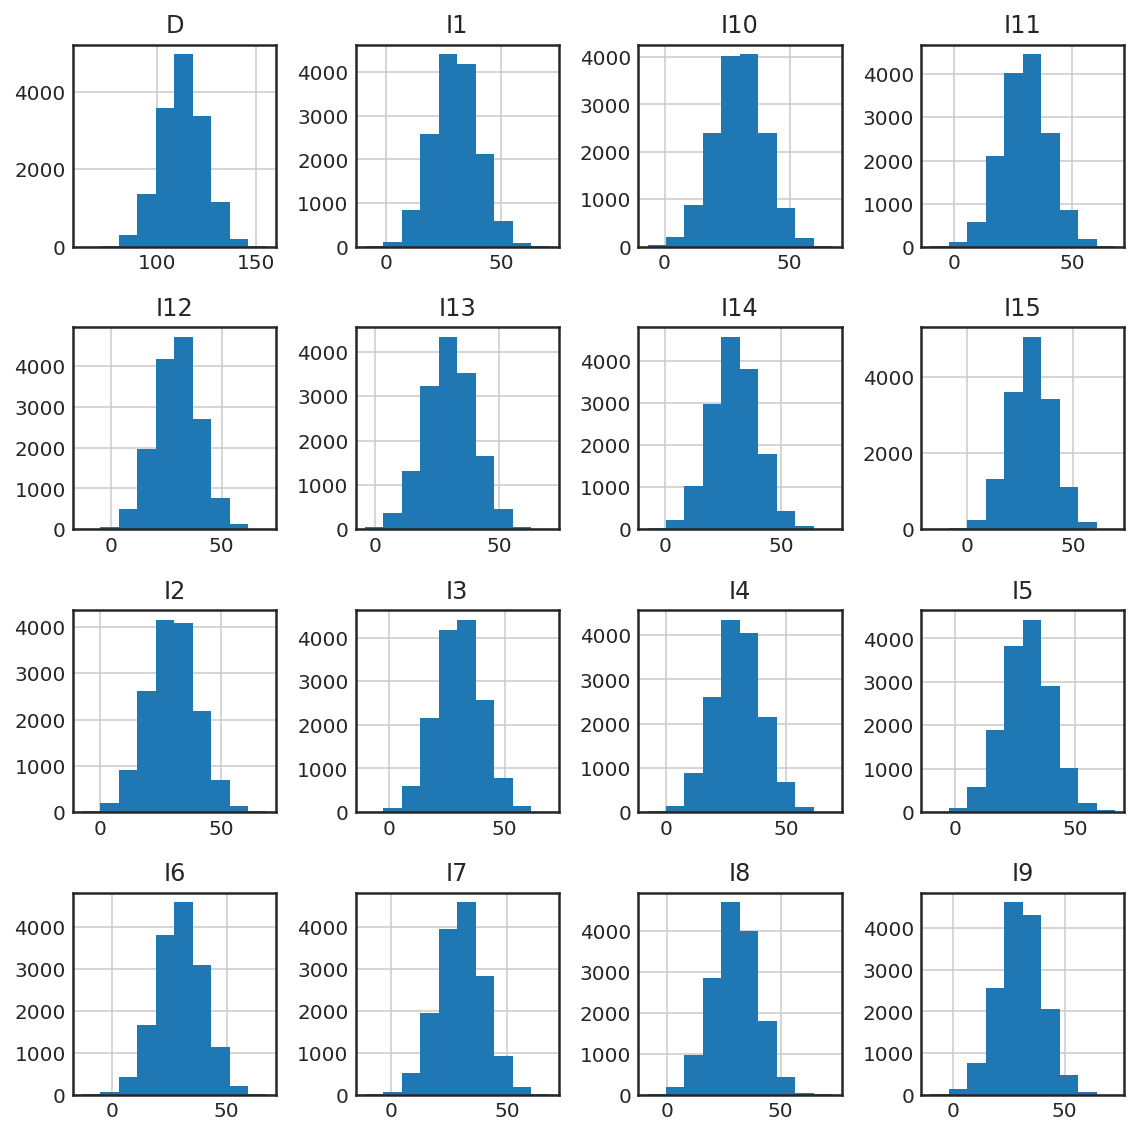

In [7]:
plt.style.use('seaborn-white')
df.hist(figsize=(8,8))
plt.tight_layout()

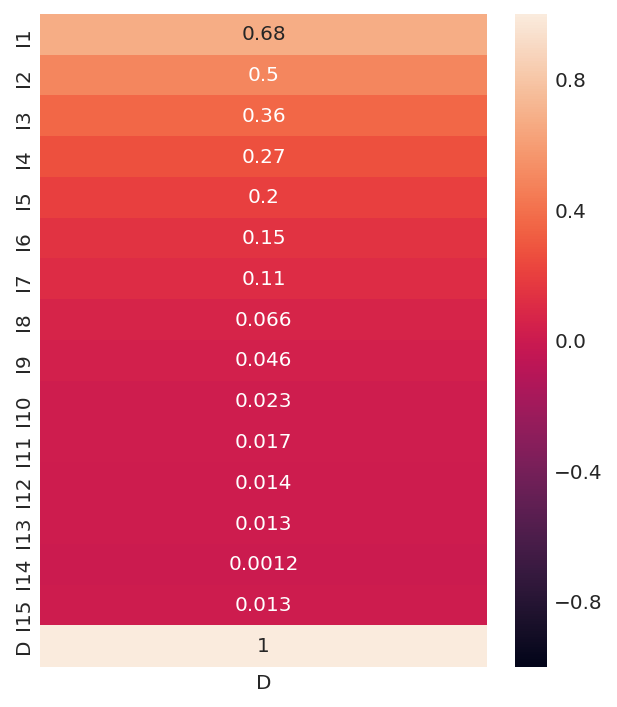

In [8]:
plt.figure(figsize=(5,6))
sns.heatmap(df.corr()[['D']],annot=True,vmin=-1,vmax=1)

In [9]:
# feature scale
mm = MinMaxScaler()
scale_features = [
    'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12',
    'I13', 'I14', 'I15', 'D'
]
df[scale_features] = mm.fit_transform(df[scale_features])

In [10]:
df.head(10)

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,D
0,0.633399,0.420534,0.405178,0.687349,0.609785,0.502013,0.669150,0.466403,0.419420,0.621642,0.533036,0.511251,0.354611,0.560121,0.565076,0.645123
1,0.438487,0.406252,0.595786,0.379802,0.602625,0.480607,0.621319,0.515165,0.233879,0.395921,0.699903,0.319281,0.413335,0.509026,0.550695,0.484718
2,0.442100,0.539386,0.397291,0.728020,0.600424,0.657005,0.560622,0.736664,0.570665,0.595797,0.613081,0.777846,0.511106,0.683122,0.619335,0.619172
3,0.545667,0.284821,0.526045,0.447530,0.431939,0.637082,0.639992,0.515729,0.642546,0.374795,0.649965,0.420014,0.292462,0.413033,0.421281,0.501912
4,0.578856,0.351192,0.371690,0.729965,0.739123,0.563663,0.485867,0.315460,0.439863,0.421184,0.572515,0.629354,0.502375,0.379465,0.594794,0.574211
5,0.514832,0.364715,0.485660,0.550916,0.690213,0.461458,0.632418,0.369223,0.462423,0.331801,0.422192,0.246724,0.564565,0.435155,0.610905,0.527329
6,0.485717,0.470764,0.416282,0.715934,0.607949,0.466258,0.485152,0.678378,0.375274,0.443891,0.416630,0.511900,0.537285,0.516858,0.726711,0.567910
7,0.427673,0.478330,0.517658,0.402030,0.548416,0.424468,0.522950,0.268831,0.582674,0.392675,0.455074,0.632973,0.601597,0.462578,0.498651,0.465922
8,0.622585,0.494222,0.281656,0.740354,0.527052,0.597125,0.522523,0.296607,0.450211,0.599097,0.549643,0.679817,0.573591,0.457277,0.481410,0.611589
9,0.566036,0.452476,0.499393,0.448861,0.286328,0.672676,0.484161,0.275793,0.555216,0.307958,0.643407,0.518548,0.584525,0.538703,0.607353,0.523270


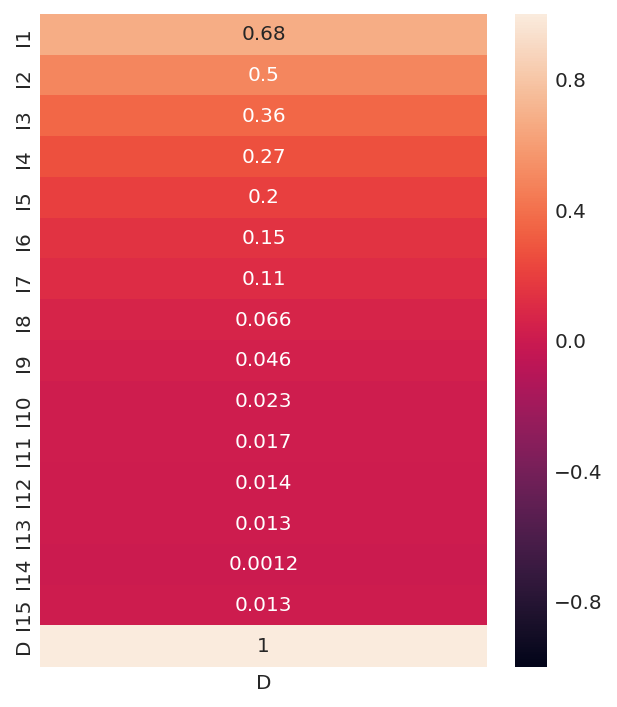

In [11]:
plt.figure(figsize=(5,6))
sns.heatmap(df.corr()[['D']],annot=True,vmin=-1,vmax=1)

In [12]:
X = df.drop(['D'],axis=1).values
y = df['D'].values

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(12000, 15) (12000,) (3000, 15) (3000,)


In [12]:
tpot = TPOTRegressor(
    scoring='neg_mean_absolute_error',
    max_time_mins=500,
    n_jobs=-1,
    verbosity=2,
    early_stop=10,
    warm_start=True,
    cv=10)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress: 201pipeline [17:32, 17.42s/pipeline]                     

Generation 1 - Current best internal CV score: -0.0015021893322728378


Optimization Progress: 302pipeline [26:54,  9.49s/pipeline]                   

Generation 2 - Current best internal CV score: -0.0015021893322728378


Optimization Progress: 402pipeline [34:06, 13.54s/pipeline]                   

Generation 3 - Current best internal CV score: -0.0015021893322728378


Optimization Progress: 502pipeline [39:33,  5.93s/pipeline]                   

Generation 4 - Current best internal CV score: -0.0015021893322728378


Optimization Progress: 604pipeline [47:30, 18.87s/pipeline]                     

Generation 5 - Current best internal CV score: -0.0015021893322728378


Optimization Progress: 704pipeline [53:43, 12.92s/pipeline]                   

Generation 6 - Current best internal CV score: -0.0014599549971453952


Optimization Progress: 805pipeline [1:04:28, 14.56s/pipeline]                   

Generation 7 - Current best internal CV score: -0.0014418576422723956


Optimization Progress: 908pipeline [1:17:21, 12.28s/pipeline]                   

Generation 8 - Current best internal CV score: -0.0014418576422723956


Optimization Progress: 1011pipeline [1:29:09, 10.46s/pipeline]                   

Generation 9 - Current best internal CV score: -0.0013613976368720652


Optimization Progress: 1114pipeline [1:45:11, 10.30s/pipeline]                    

Generation 10 - Current best internal CV score: -0.0013613976368720652


Optimization Progress: 1214pipeline [1:54:31, 14.70s/pipeline]                    

Generation 11 - Current best internal CV score: -0.0013613976368720652


Optimization Progress: 1315pipeline [2:04:22,  8.53s/pipeline]                    

Generation 12 - Current best internal CV score: -0.0013613976368720652


Optimization Progress: 1416pipeline [2:17:43,  7.67s/pipeline]                    

Generation 13 - Current best internal CV score: -0.0013613976368720652


Optimization Progress: 1518pipeline [2:29:48, 49.17s/pipeline]                      

Generation 14 - Current best internal CV score: -0.001356730692497412


Optimization Progress: 1621pipeline [2:43:16, 20.21s/pipeline]                      

Generation 15 - Current best internal CV score: -0.0012080943933963522


Optimization Progress: 1721pipeline [2:54:08, 37.20s/pipeline]                       

Generation 16 - Current best internal CV score: -0.0012080943933963522


Optimization Progress: 1822pipeline [3:06:26, 11.33s/pipeline]                    

Generation 17 - Current best internal CV score: -0.0012068191312184862


Optimization Progress: 1926pipeline [3:21:20, 17.09s/pipeline]                    

Generation 18 - Current best internal CV score: -0.0012068191311378803


Optimization Progress: 2027pipeline [3:33:23, 11.55s/pipeline]                    

Generation 19 - Current best internal CV score: -0.0012068191311378803


Optimization Progress: 2127pipeline [3:43:52, 14.91s/pipeline]                    

Generation 20 - Current best internal CV score: -0.0011807987386983992


Optimization Progress: 2228pipeline [3:55:18, 13.04s/pipeline]                    

Generation 21 - Current best internal CV score: -0.0011807987386983992


Optimization Progress: 2333pipeline [4:12:17, 14.72s/pipeline]                    

Generation 22 - Current best internal CV score: -0.0011807987386983992


Optimization Progress: 2435pipeline [4:29:07, 16.64s/pipeline]                    

Generation 23 - Current best internal CV score: -0.0011252099508384217


Optimization Progress: 2540pipeline [4:44:39, 15.88s/pipeline]                    

Generation 24 - Current best internal CV score: -0.0011252099508384217


Optimization Progress: 2643pipeline [4:57:22, 11.90s/pipeline]                    

Generation 25 - Current best internal CV score: -0.0011252099508384217



302.02611774999997 minutes have elapsed. TPOT will close down.
TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LassoLarsCV(CombineDFs(Binarizer(input_matrix, threshold=0.25), PolynomialFeatures(StandardScaler(input_matrix), degree=2, include_bias=False, interaction_only=False)), normalize=True)
-0.00117200354583


In [13]:
tpot.export('tpot_regression_mid_pipeline.py')

True

In [14]:
print(tpot.score(X_test,y_test))

-0.00117200354583


In [15]:
print(tpot.fitted_pipeline_)

Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('binarizer', Binarizer(copy=True, threshold=0.25)), ('pipeline', Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2...x_n_alphas=1000, n_jobs=1,
      normalize=True, positive=False, precompute='auto', verbose=False))])


## Using SHAP to interprete the model

In [1]:
import xgboost as xgb
import shap
from xgboost import XGBRegressor

shap.initjs()

In [13]:
feature_loc = ['I1','I2','I3','I4','I5','I6','I7','I8','I9','I10','I11','I12','I13','I14','I15']
X = df.loc[:,feature_loc]
Y = df.D
print(X.shape, Y.shape)

(15000, 15) (15000,)


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=.2, random_state=0)

In [15]:
model = XGBRegressor(
    learning_rate=0.1,
    base_score=0.5,
    booster='gbtree',
    n_estimators=5000,
    max_depth=2,
    min_child_weight=4,
    )
model.fit(X_train, y_train, eval_metric='mae',verbose=True,
         eval_set=[(X_test,y_test)],early_stopping_rounds=20)

[0]	validation_0-mae:0.098417
Will train until validation_0-mae hasn't improved in 20 rounds.
[1]	validation_0-mae:0.093772
[2]	validation_0-mae:0.089454
[3]	validation_0-mae:0.085676
[4]	validation_0-mae:0.082483
[5]	validation_0-mae:0.079394
[6]	validation_0-mae:0.076767
[7]	validation_0-mae:0.074273
[8]	validation_0-mae:0.072082
[9]	validation_0-mae:0.069961
[10]	validation_0-mae:0.06802
[11]	validation_0-mae:0.06619
[12]	validation_0-mae:0.06471
[13]	validation_0-mae:0.06321
[14]	validation_0-mae:0.061734
[15]	validation_0-mae:0.060412
[16]	validation_0-mae:0.059083
[17]	validation_0-mae:0.057797
[18]	validation_0-mae:0.05671
[19]	validation_0-mae:0.055644
[20]	validation_0-mae:0.054581
[21]	validation_0-mae:0.053554
[22]	validation_0-mae:0.05269
[23]	validation_0-mae:0.05178
[24]	validation_0-mae:0.05075
[25]	validation_0-mae:0.04993
[26]	validation_0-mae:0.049125
[27]	validation_0-mae:0.048331
[28]	validation_0-mae:0.04765
[29]	validation_0-mae:0.046912
[30]	validation_0-mae:0.04

[259]	validation_0-mae:0.009236
[260]	validation_0-mae:0.00921
[261]	validation_0-mae:0.009187
[262]	validation_0-mae:0.009159
[263]	validation_0-mae:0.009131
[264]	validation_0-mae:0.009086
[265]	validation_0-mae:0.009052
[266]	validation_0-mae:0.009022
[267]	validation_0-mae:0.008991
[268]	validation_0-mae:0.008966
[269]	validation_0-mae:0.008938
[270]	validation_0-mae:0.008919
[271]	validation_0-mae:0.008893
[272]	validation_0-mae:0.008866
[273]	validation_0-mae:0.008844
[274]	validation_0-mae:0.008825
[275]	validation_0-mae:0.008804
[276]	validation_0-mae:0.008784
[277]	validation_0-mae:0.008752
[278]	validation_0-mae:0.008725
[279]	validation_0-mae:0.008703
[280]	validation_0-mae:0.008682
[281]	validation_0-mae:0.008662
[282]	validation_0-mae:0.00864
[283]	validation_0-mae:0.008618
[284]	validation_0-mae:0.008597
[285]	validation_0-mae:0.008576
[286]	validation_0-mae:0.008545
[287]	validation_0-mae:0.008528
[288]	validation_0-mae:0.008504
[289]	validation_0-mae:0.008477
[290]	vali

[516]	validation_0-mae:0.006378
[517]	validation_0-mae:0.006375
[518]	validation_0-mae:0.006371
[519]	validation_0-mae:0.006368
[520]	validation_0-mae:0.006365
[521]	validation_0-mae:0.006361
[522]	validation_0-mae:0.006358
[523]	validation_0-mae:0.006355
[524]	validation_0-mae:0.006352
[525]	validation_0-mae:0.006348
[526]	validation_0-mae:0.006342
[527]	validation_0-mae:0.00634
[528]	validation_0-mae:0.006336
[529]	validation_0-mae:0.006334
[530]	validation_0-mae:0.006333
[531]	validation_0-mae:0.006324
[532]	validation_0-mae:0.006322
[533]	validation_0-mae:0.006314
[534]	validation_0-mae:0.006313
[535]	validation_0-mae:0.00631
[536]	validation_0-mae:0.006308
[537]	validation_0-mae:0.006306
[538]	validation_0-mae:0.006303
[539]	validation_0-mae:0.006301
[540]	validation_0-mae:0.006299
[541]	validation_0-mae:0.006297
[542]	validation_0-mae:0.006295
[543]	validation_0-mae:0.006292
[544]	validation_0-mae:0.006287
[545]	validation_0-mae:0.006285
[546]	validation_0-mae:0.006282
[547]	vali

[773]	validation_0-mae:0.005763
[774]	validation_0-mae:0.005759
[775]	validation_0-mae:0.005754
[776]	validation_0-mae:0.005752
[777]	validation_0-mae:0.005749
[778]	validation_0-mae:0.005746
[779]	validation_0-mae:0.005746
[780]	validation_0-mae:0.005745
[781]	validation_0-mae:0.005744
[782]	validation_0-mae:0.005743
[783]	validation_0-mae:0.005743
[784]	validation_0-mae:0.005741
[785]	validation_0-mae:0.005738
[786]	validation_0-mae:0.005737
[787]	validation_0-mae:0.005737
[788]	validation_0-mae:0.005736
[789]	validation_0-mae:0.005735
[790]	validation_0-mae:0.005734
[791]	validation_0-mae:0.005729
[792]	validation_0-mae:0.005728
[793]	validation_0-mae:0.005726
[794]	validation_0-mae:0.005724
[795]	validation_0-mae:0.005722
[796]	validation_0-mae:0.005721
[797]	validation_0-mae:0.005719
[798]	validation_0-mae:0.005715
[799]	validation_0-mae:0.005712
[800]	validation_0-mae:0.005711
[801]	validation_0-mae:0.005711
[802]	validation_0-mae:0.00571
[803]	validation_0-mae:0.005707
[804]	val

[1029]	validation_0-mae:0.005355
[1030]	validation_0-mae:0.005352
[1031]	validation_0-mae:0.005351
[1032]	validation_0-mae:0.005351
[1033]	validation_0-mae:0.00535
[1034]	validation_0-mae:0.00535
[1035]	validation_0-mae:0.00535
[1036]	validation_0-mae:0.005349
[1037]	validation_0-mae:0.005349
[1038]	validation_0-mae:0.005348
[1039]	validation_0-mae:0.005348
[1040]	validation_0-mae:0.005347
[1041]	validation_0-mae:0.005344
[1042]	validation_0-mae:0.005343
[1043]	validation_0-mae:0.005341
[1044]	validation_0-mae:0.005341
[1045]	validation_0-mae:0.00534
[1046]	validation_0-mae:0.005339
[1047]	validation_0-mae:0.005337
[1048]	validation_0-mae:0.005337
[1049]	validation_0-mae:0.005334
[1050]	validation_0-mae:0.005333
[1051]	validation_0-mae:0.005331
[1052]	validation_0-mae:0.00533
[1053]	validation_0-mae:0.005329
[1054]	validation_0-mae:0.005328
[1055]	validation_0-mae:0.005326
[1056]	validation_0-mae:0.005326
[1057]	validation_0-mae:0.005325
[1058]	validation_0-mae:0.005325
[1059]	validati

[1279]	validation_0-mae:0.005088
[1280]	validation_0-mae:0.005085
[1281]	validation_0-mae:0.005085
[1282]	validation_0-mae:0.005084
[1283]	validation_0-mae:0.005084
[1284]	validation_0-mae:0.005084
[1285]	validation_0-mae:0.005083
[1286]	validation_0-mae:0.005081
[1287]	validation_0-mae:0.005078
[1288]	validation_0-mae:0.005078
[1289]	validation_0-mae:0.005075
[1290]	validation_0-mae:0.005073
[1291]	validation_0-mae:0.005073
[1292]	validation_0-mae:0.005073
[1293]	validation_0-mae:0.005072
[1294]	validation_0-mae:0.005072
[1295]	validation_0-mae:0.005071
[1296]	validation_0-mae:0.005071
[1297]	validation_0-mae:0.005071
[1298]	validation_0-mae:0.005071
[1299]	validation_0-mae:0.005071
[1300]	validation_0-mae:0.00507
[1301]	validation_0-mae:0.00507
[1302]	validation_0-mae:0.005069
[1303]	validation_0-mae:0.005068
[1304]	validation_0-mae:0.005067
[1305]	validation_0-mae:0.005067
[1306]	validation_0-mae:0.005064
[1307]	validation_0-mae:0.005062
[1308]	validation_0-mae:0.005061
[1309]	valid

[1529]	validation_0-mae:0.00486
[1530]	validation_0-mae:0.00486
[1531]	validation_0-mae:0.004859
[1532]	validation_0-mae:0.004859
[1533]	validation_0-mae:0.004858
[1534]	validation_0-mae:0.004858
[1535]	validation_0-mae:0.004858
[1536]	validation_0-mae:0.004858
[1537]	validation_0-mae:0.004857
[1538]	validation_0-mae:0.004855
[1539]	validation_0-mae:0.004854
[1540]	validation_0-mae:0.004854
[1541]	validation_0-mae:0.004852
[1542]	validation_0-mae:0.004851
[1543]	validation_0-mae:0.004851
[1544]	validation_0-mae:0.004849
[1545]	validation_0-mae:0.004847
[1546]	validation_0-mae:0.004847
[1547]	validation_0-mae:0.004847
[1548]	validation_0-mae:0.004846
[1549]	validation_0-mae:0.004846
[1550]	validation_0-mae:0.004846
[1551]	validation_0-mae:0.004846
[1552]	validation_0-mae:0.004846
[1553]	validation_0-mae:0.004846
[1554]	validation_0-mae:0.004846
[1555]	validation_0-mae:0.004845
[1556]	validation_0-mae:0.004845
[1557]	validation_0-mae:0.004844
[1558]	validation_0-mae:0.004845
[1559]	valid

[1779]	validation_0-mae:0.004696
[1780]	validation_0-mae:0.004695
[1781]	validation_0-mae:0.004693
[1782]	validation_0-mae:0.004692
[1783]	validation_0-mae:0.004691
[1784]	validation_0-mae:0.004691
[1785]	validation_0-mae:0.004689
[1786]	validation_0-mae:0.004688
[1787]	validation_0-mae:0.004688
[1788]	validation_0-mae:0.004687
[1789]	validation_0-mae:0.004688
[1790]	validation_0-mae:0.004687
[1791]	validation_0-mae:0.004687
[1792]	validation_0-mae:0.004687
[1793]	validation_0-mae:0.004686
[1794]	validation_0-mae:0.004685
[1795]	validation_0-mae:0.004684
[1796]	validation_0-mae:0.004682
[1797]	validation_0-mae:0.004682
[1798]	validation_0-mae:0.004682
[1799]	validation_0-mae:0.004682
[1800]	validation_0-mae:0.004682
[1801]	validation_0-mae:0.004682
[1802]	validation_0-mae:0.00468
[1803]	validation_0-mae:0.00468
[1804]	validation_0-mae:0.004679
[1805]	validation_0-mae:0.004678
[1806]	validation_0-mae:0.004678
[1807]	validation_0-mae:0.004677
[1808]	validation_0-mae:0.004677
[1809]	valid

[2029]	validation_0-mae:0.004539
[2030]	validation_0-mae:0.004538
[2031]	validation_0-mae:0.004538
[2032]	validation_0-mae:0.004536
[2033]	validation_0-mae:0.004535
[2034]	validation_0-mae:0.004533
[2035]	validation_0-mae:0.004532
[2036]	validation_0-mae:0.00453
[2037]	validation_0-mae:0.00453
[2038]	validation_0-mae:0.00453
[2039]	validation_0-mae:0.00453
[2040]	validation_0-mae:0.00453
[2041]	validation_0-mae:0.004529
[2042]	validation_0-mae:0.004529
[2043]	validation_0-mae:0.004528
[2044]	validation_0-mae:0.004528
[2045]	validation_0-mae:0.004527
[2046]	validation_0-mae:0.004527
[2047]	validation_0-mae:0.004526
[2048]	validation_0-mae:0.004526
[2049]	validation_0-mae:0.004524
[2050]	validation_0-mae:0.004523
[2051]	validation_0-mae:0.004523
[2052]	validation_0-mae:0.004523
[2053]	validation_0-mae:0.004522
[2054]	validation_0-mae:0.004521
[2055]	validation_0-mae:0.00452
[2056]	validation_0-mae:0.004519
[2057]	validation_0-mae:0.004518
[2058]	validation_0-mae:0.004516
[2059]	validatio

[2279]	validation_0-mae:0.004394
[2280]	validation_0-mae:0.004394
[2281]	validation_0-mae:0.004393
[2282]	validation_0-mae:0.004392
[2283]	validation_0-mae:0.004392
[2284]	validation_0-mae:0.004392
[2285]	validation_0-mae:0.004392
[2286]	validation_0-mae:0.004392
[2287]	validation_0-mae:0.004391
[2288]	validation_0-mae:0.004391
[2289]	validation_0-mae:0.004391
[2290]	validation_0-mae:0.004391
[2291]	validation_0-mae:0.004391
[2292]	validation_0-mae:0.004391
[2293]	validation_0-mae:0.004391
[2294]	validation_0-mae:0.00439
[2295]	validation_0-mae:0.004389
[2296]	validation_0-mae:0.004388
[2297]	validation_0-mae:0.004388
[2298]	validation_0-mae:0.004387
[2299]	validation_0-mae:0.004387
[2300]	validation_0-mae:0.004387
[2301]	validation_0-mae:0.004387
[2302]	validation_0-mae:0.004386
[2303]	validation_0-mae:0.004386
[2304]	validation_0-mae:0.004385
[2305]	validation_0-mae:0.004385
[2306]	validation_0-mae:0.004385
[2307]	validation_0-mae:0.004385
[2308]	validation_0-mae:0.004385
[2309]	vali

[2529]	validation_0-mae:0.004285
[2530]	validation_0-mae:0.004283
[2531]	validation_0-mae:0.004282
[2532]	validation_0-mae:0.004282
[2533]	validation_0-mae:0.004282
[2534]	validation_0-mae:0.004281
[2535]	validation_0-mae:0.004281
[2536]	validation_0-mae:0.00428
[2537]	validation_0-mae:0.004279
[2538]	validation_0-mae:0.004279
[2539]	validation_0-mae:0.004278
[2540]	validation_0-mae:0.004277
[2541]	validation_0-mae:0.004277
[2542]	validation_0-mae:0.004277
[2543]	validation_0-mae:0.004276
[2544]	validation_0-mae:0.004275
[2545]	validation_0-mae:0.004275
[2546]	validation_0-mae:0.004274
[2547]	validation_0-mae:0.004273
[2548]	validation_0-mae:0.004273
[2549]	validation_0-mae:0.004273
[2550]	validation_0-mae:0.004273
[2551]	validation_0-mae:0.004273
[2552]	validation_0-mae:0.004272
[2553]	validation_0-mae:0.004271
[2554]	validation_0-mae:0.00427
[2555]	validation_0-mae:0.004269
[2556]	validation_0-mae:0.004269
[2557]	validation_0-mae:0.004268
[2558]	validation_0-mae:0.004268
[2559]	valid

[2778]	validation_0-mae:0.004177
[2779]	validation_0-mae:0.004176
[2780]	validation_0-mae:0.004176
[2781]	validation_0-mae:0.004175
[2782]	validation_0-mae:0.004175
[2783]	validation_0-mae:0.004174
[2784]	validation_0-mae:0.004174
[2785]	validation_0-mae:0.004174
[2786]	validation_0-mae:0.004172
[2787]	validation_0-mae:0.004172
[2788]	validation_0-mae:0.004171
[2789]	validation_0-mae:0.004171
[2790]	validation_0-mae:0.00417
[2791]	validation_0-mae:0.004169
[2792]	validation_0-mae:0.004169
[2793]	validation_0-mae:0.004169
[2794]	validation_0-mae:0.004168
[2795]	validation_0-mae:0.004167
[2796]	validation_0-mae:0.004166
[2797]	validation_0-mae:0.004166
[2798]	validation_0-mae:0.004165
[2799]	validation_0-mae:0.004164
[2800]	validation_0-mae:0.004164
[2801]	validation_0-mae:0.004163
[2802]	validation_0-mae:0.004163
[2803]	validation_0-mae:0.004162
[2804]	validation_0-mae:0.004162
[2805]	validation_0-mae:0.004162
[2806]	validation_0-mae:0.004161
[2807]	validation_0-mae:0.004161
[2808]	vali

[3028]	validation_0-mae:0.004066
[3029]	validation_0-mae:0.004066
[3030]	validation_0-mae:0.004066
[3031]	validation_0-mae:0.004066
[3032]	validation_0-mae:0.004065
[3033]	validation_0-mae:0.004064
[3034]	validation_0-mae:0.004063
[3035]	validation_0-mae:0.004063
[3036]	validation_0-mae:0.004063
[3037]	validation_0-mae:0.004062
[3038]	validation_0-mae:0.004061
[3039]	validation_0-mae:0.00406
[3040]	validation_0-mae:0.00406
[3041]	validation_0-mae:0.004059
[3042]	validation_0-mae:0.004059
[3043]	validation_0-mae:0.004059
[3044]	validation_0-mae:0.004059
[3045]	validation_0-mae:0.004059
[3046]	validation_0-mae:0.004059
[3047]	validation_0-mae:0.004059
[3048]	validation_0-mae:0.004058
[3049]	validation_0-mae:0.004057
[3050]	validation_0-mae:0.004057
[3051]	validation_0-mae:0.004056
[3052]	validation_0-mae:0.004055
[3053]	validation_0-mae:0.004055
[3054]	validation_0-mae:0.004055
[3055]	validation_0-mae:0.004055
[3056]	validation_0-mae:0.004055
[3057]	validation_0-mae:0.004054
[3058]	valid

[3278]	validation_0-mae:0.003988
[3279]	validation_0-mae:0.003988
Stopping. Best iteration:
[3259]	validation_0-mae:0.003988



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=4, missing=None, n_estimators=5000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [16]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
print("score: {:.4f}".format(mean_absolute_error(y_test,y_pred)))

score: 0.0040


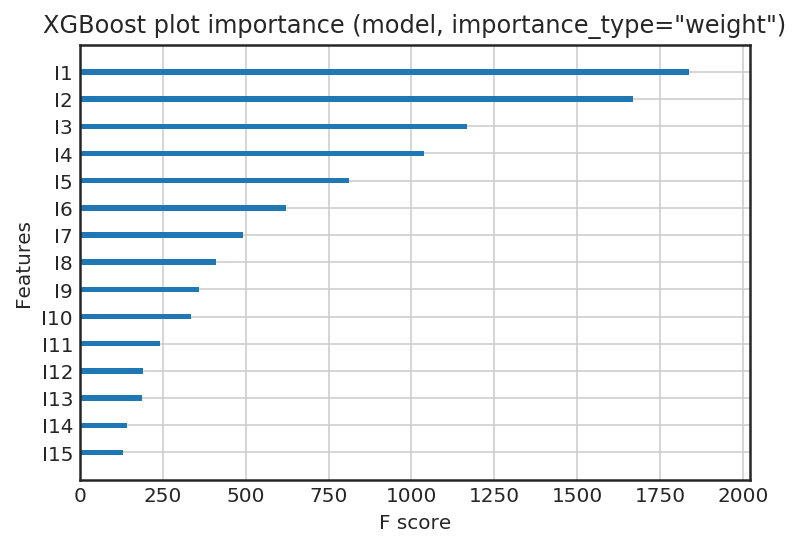

In [17]:
xgb.plot_importance(model, importance_type="weight",show_values=False)
plt.title('XGBoost plot importance (model, importance_type="weight")')
plt.show()

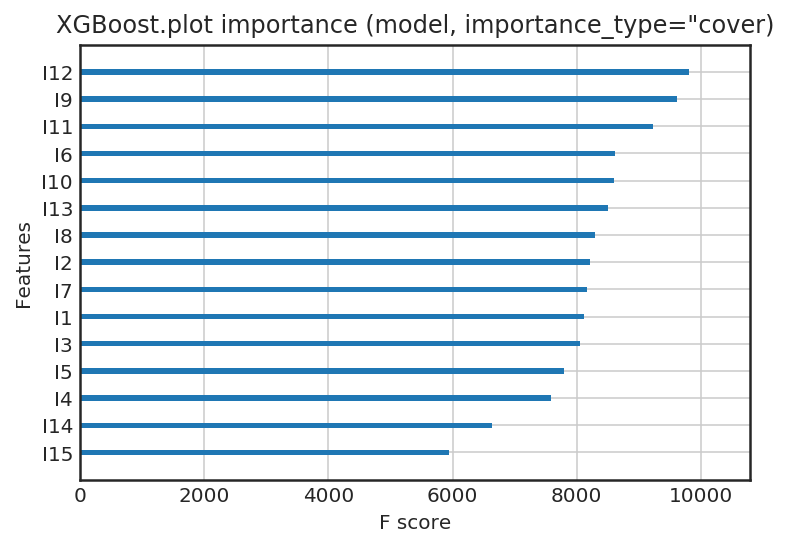

In [18]:
xgb.plot_importance(model,importance_type="cover",show_values=False)
plt.title('XGBoost.plot importance (model, importance_type="cover)')
plt.show()

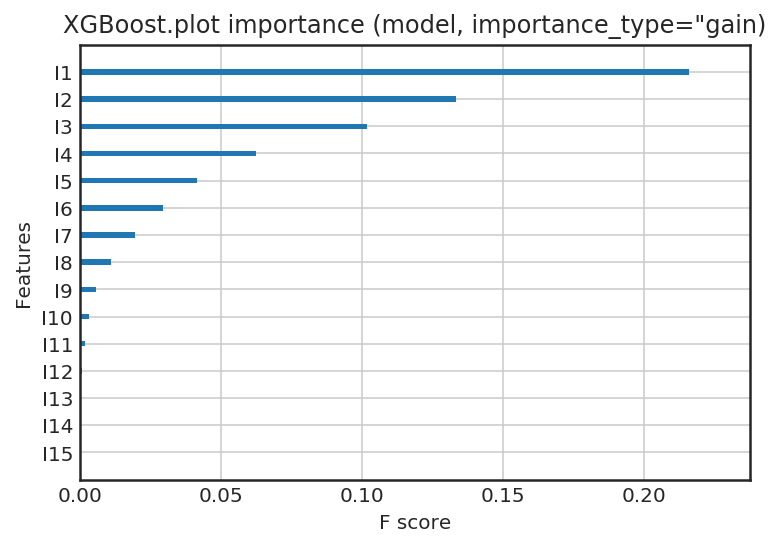

In [19]:
xgb.plot_importance(model,importance_type="gain",show_values=False)
plt.title('XGBoost.plot importance (model, importance_type="gain)')
plt.show()

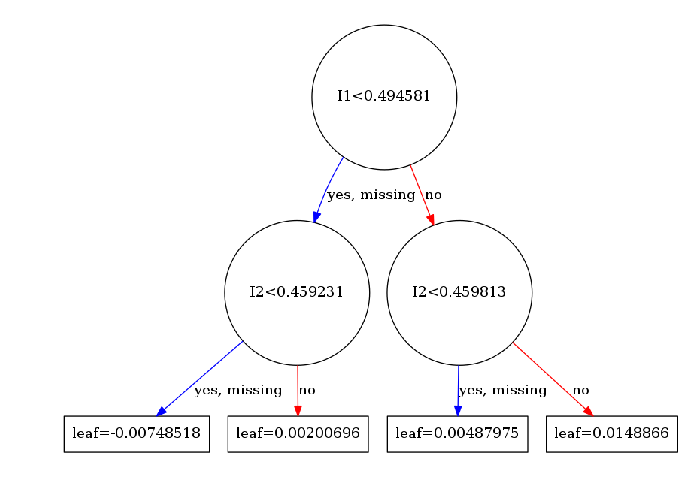

In [20]:
xgb.plot_tree(model)

In [21]:
shap_values = shap.TreeExplainer(model).shap_values(X)
shap_values.shape

(15000, 16)

In [22]:
shap.force_plot(shap_values[0,:], X.iloc[0,:])

In [27]:
shap.force_plot(shap_values[:1000,:],X.iloc[:1000,:])

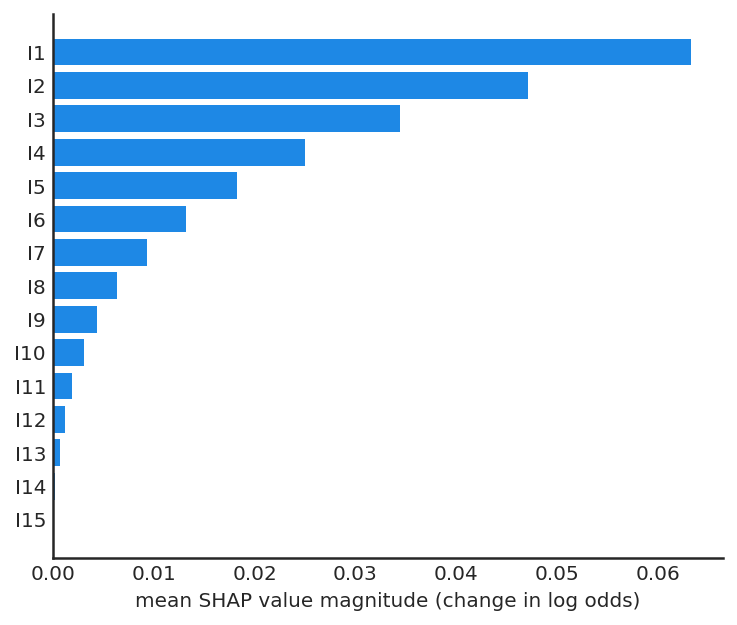

In [23]:
global_shap_vals = np.abs(shap_values).mean(0)[:-1]
inds = np.argsort(global_shap_vals)
y_pos = np.arange(X.shape[1])
plt.barh(y_pos, global_shap_vals[inds], color='#1E88E5')
plt.yticks(y_pos, X.columns[inds])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel("mean SHAP value magnitude (change in log odds)")
plt.gcf().set_size_inches(6,5)
plt.show()

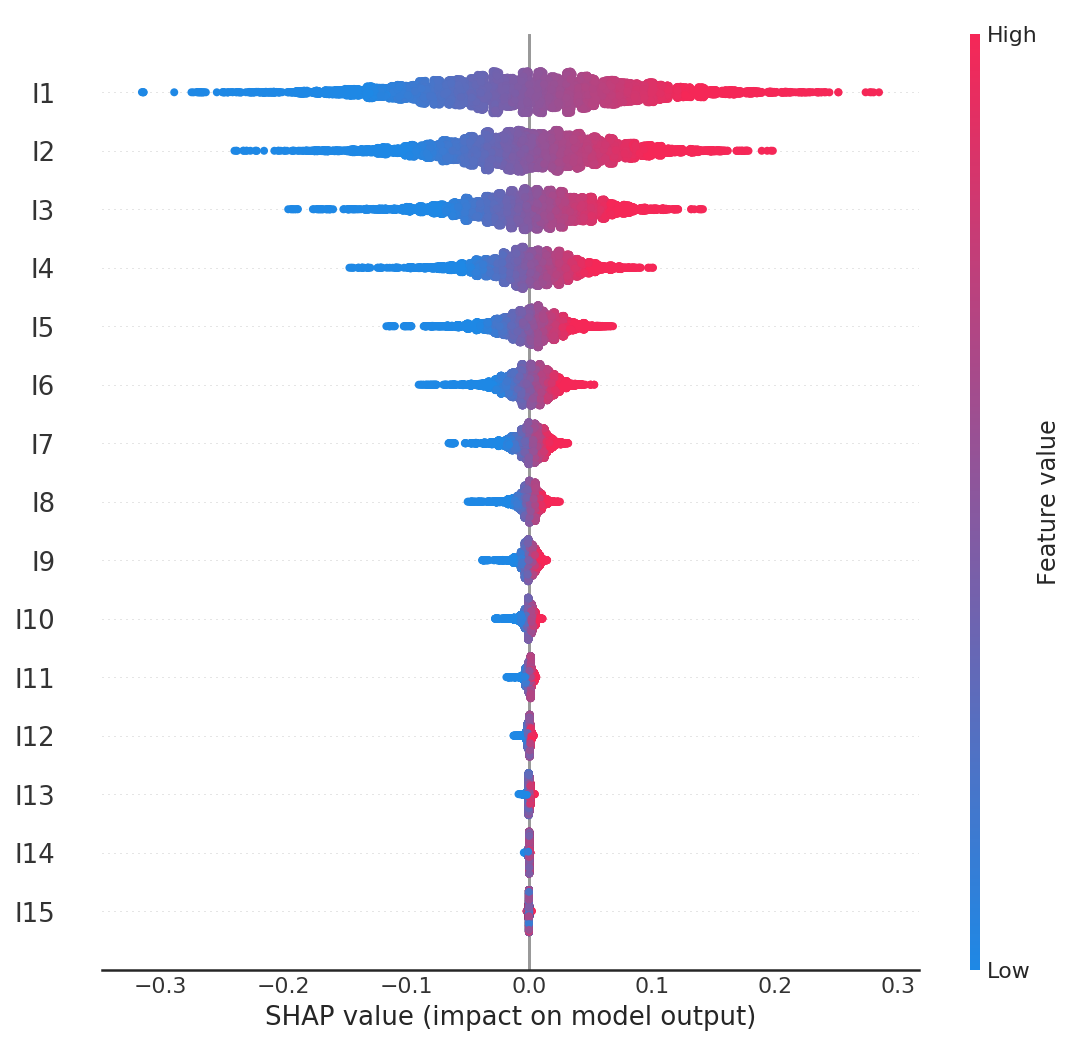

In [24]:
shap.summary_plot(shap_values, X)

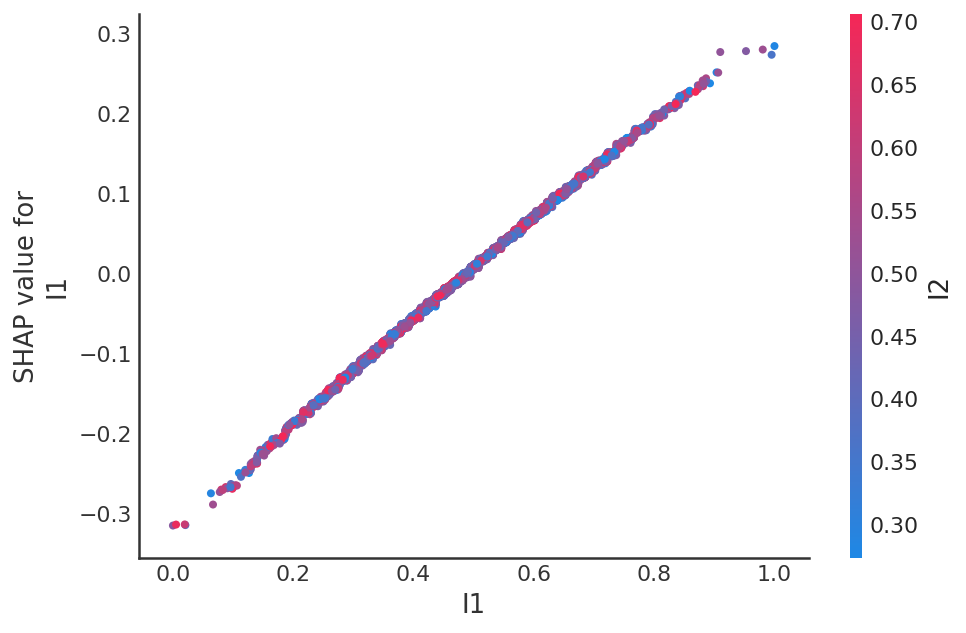

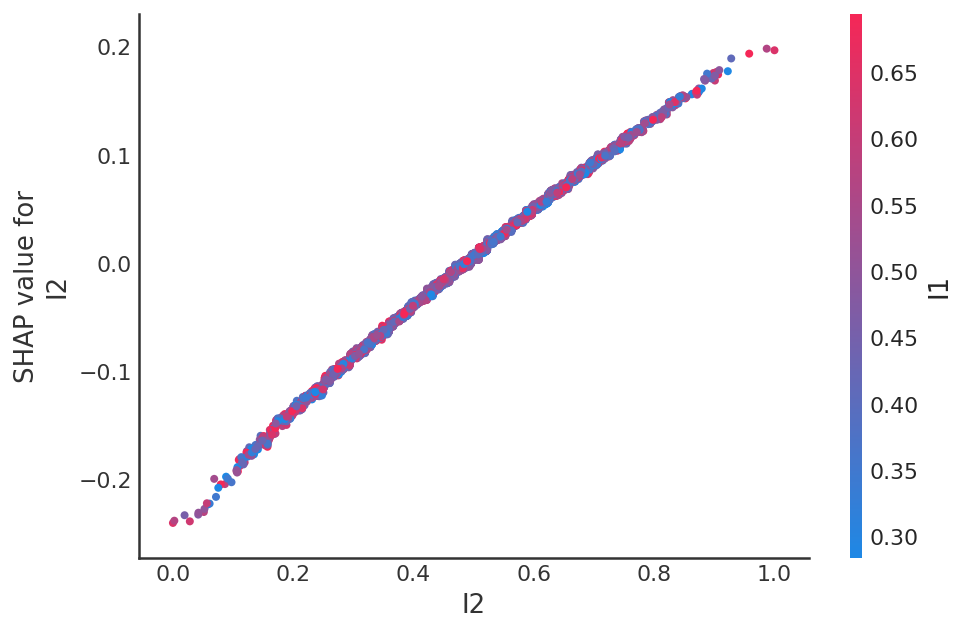

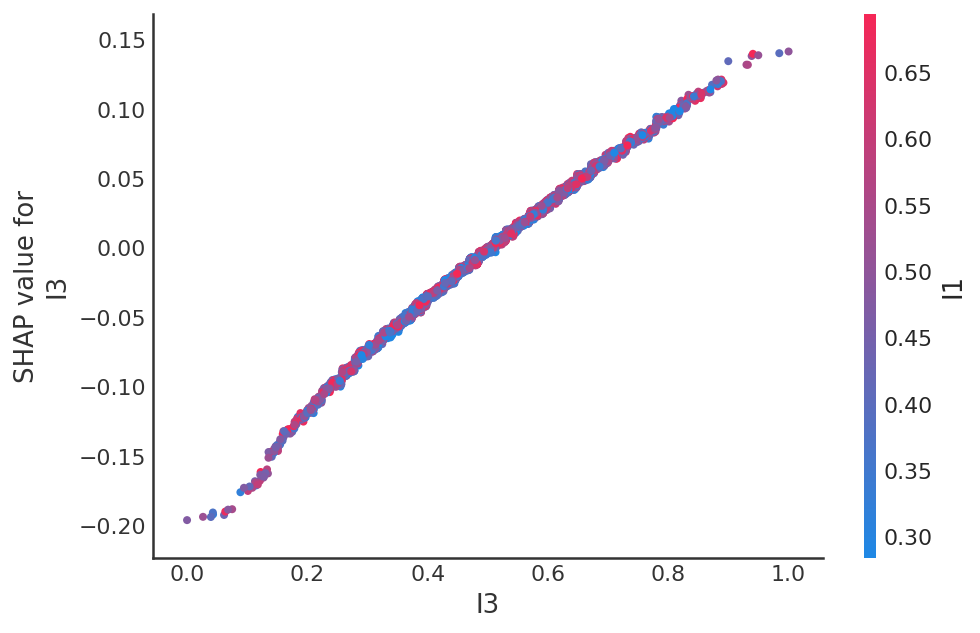

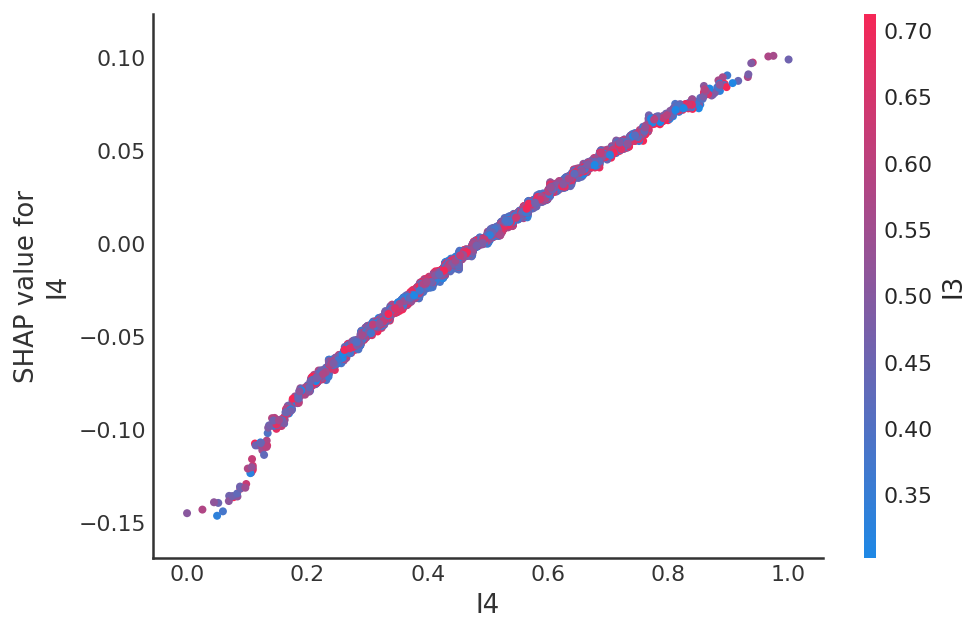

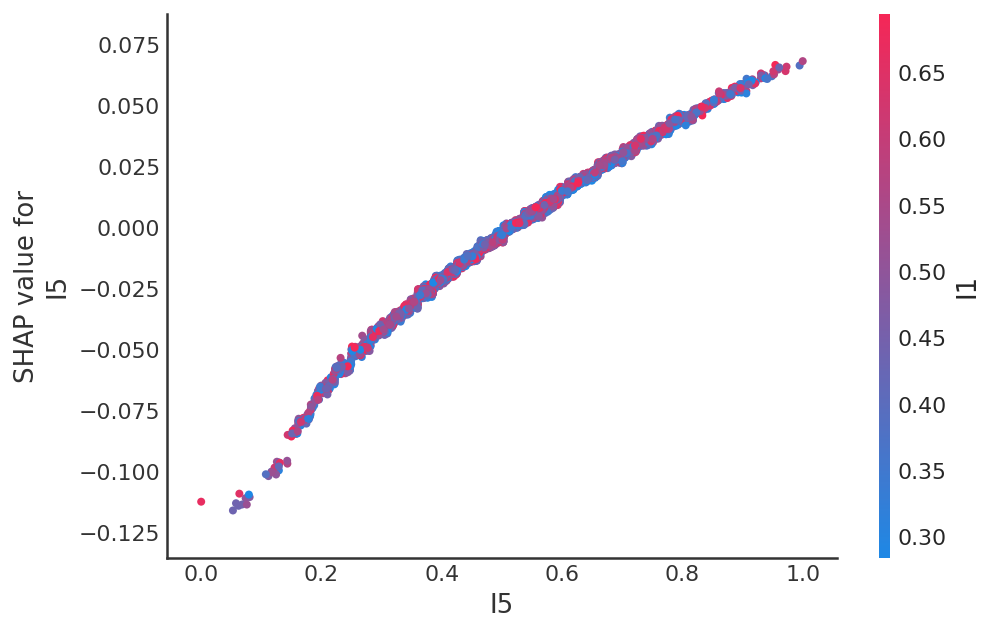

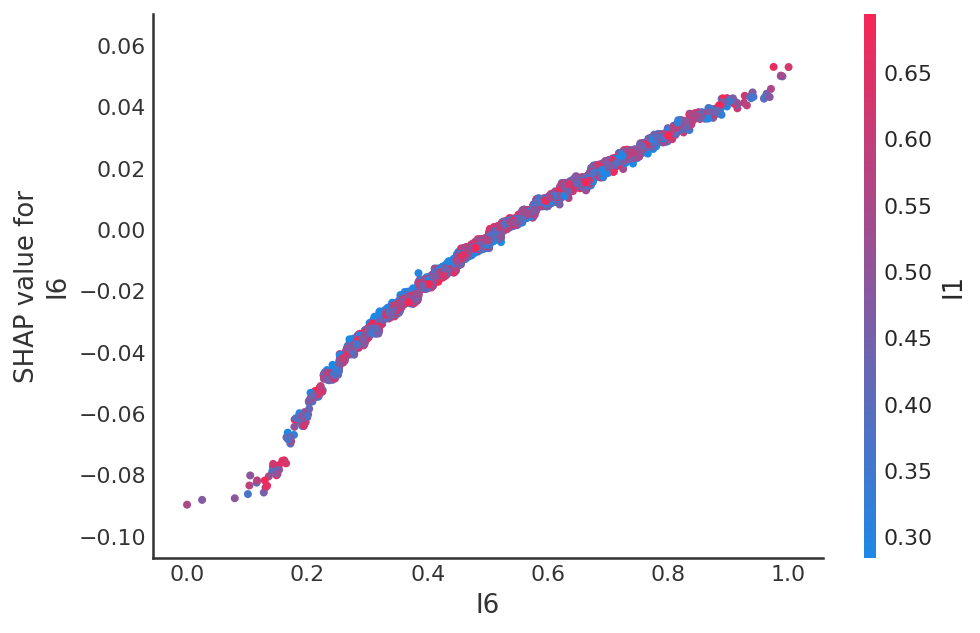

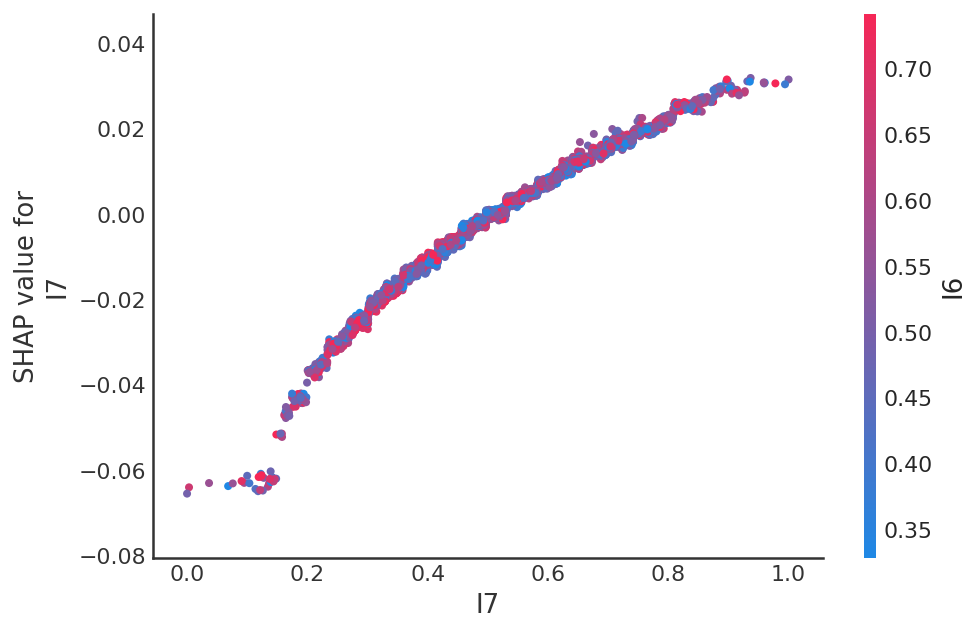

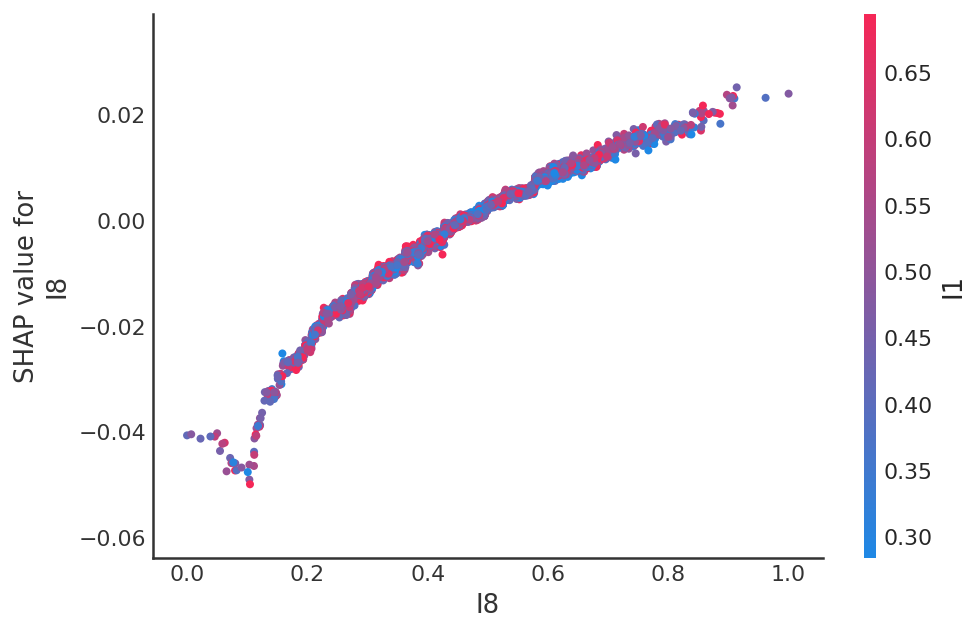

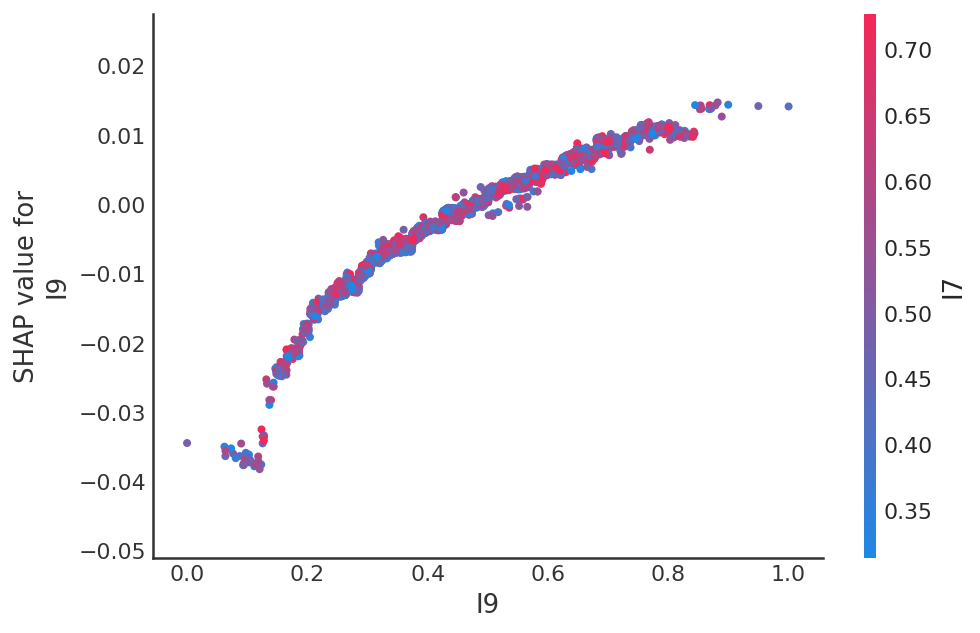

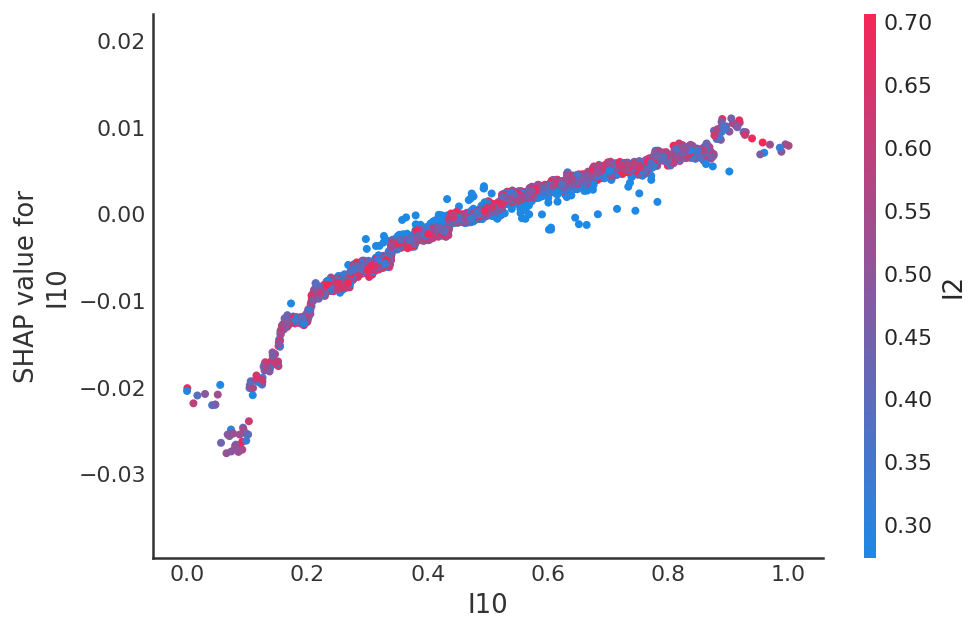

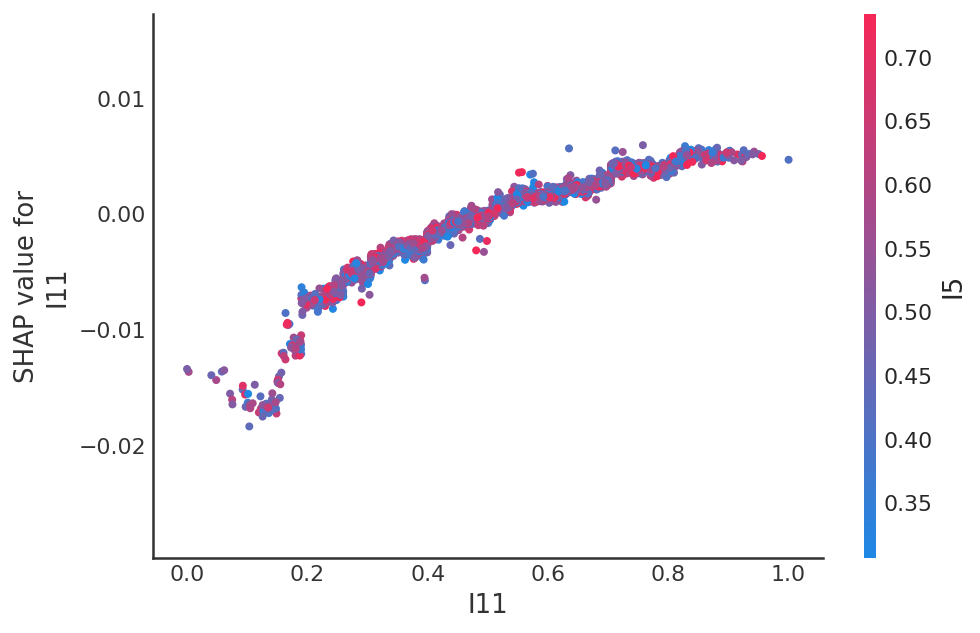

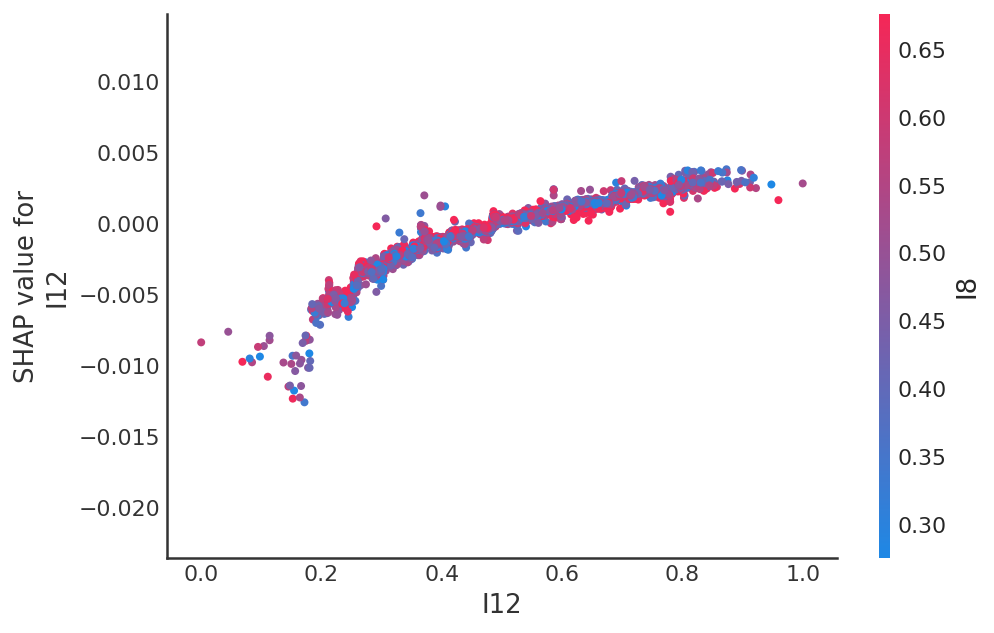

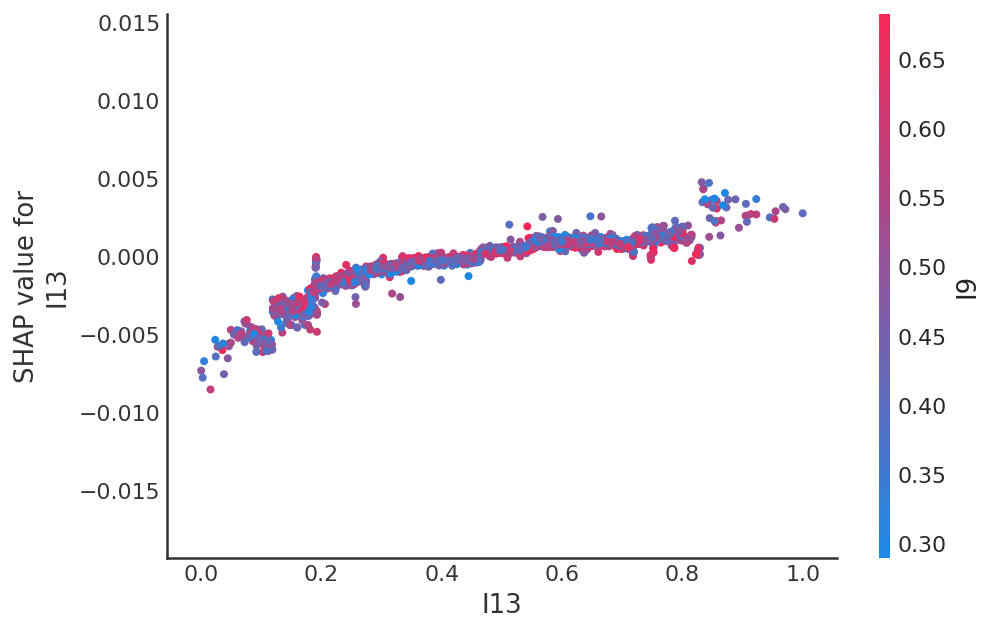

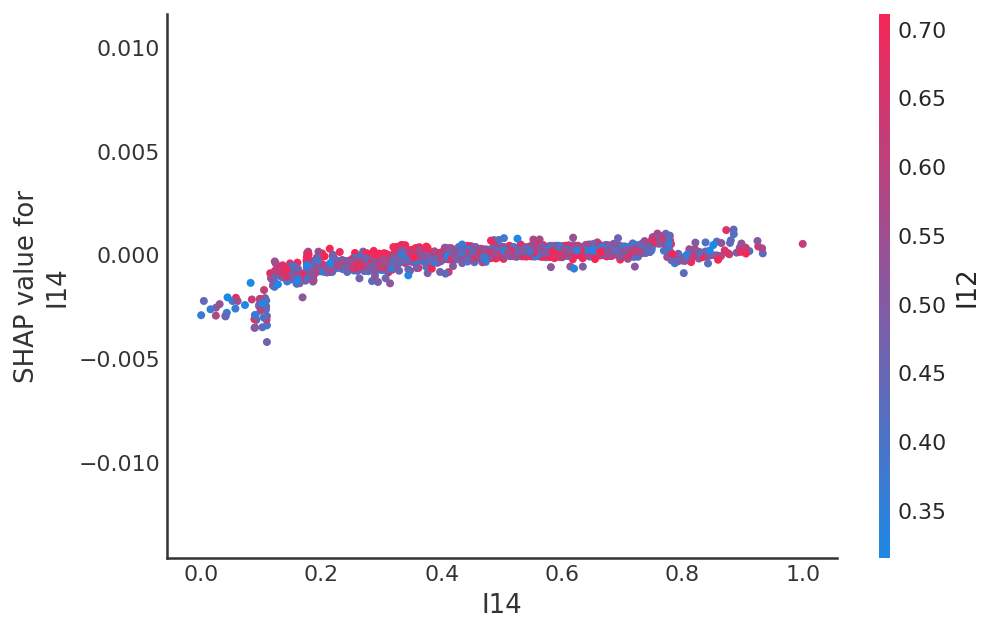

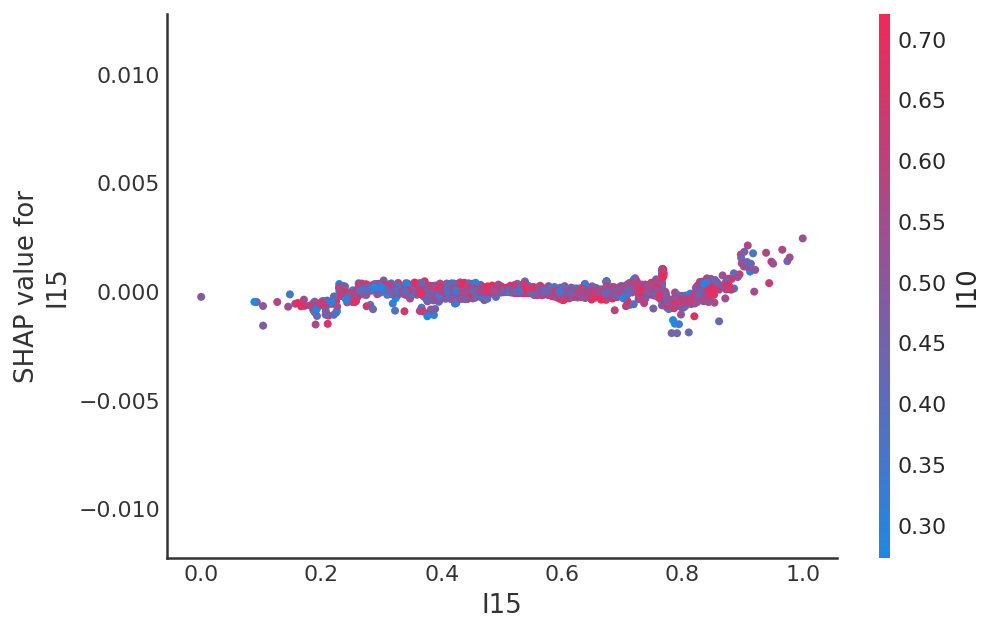

In [25]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X)

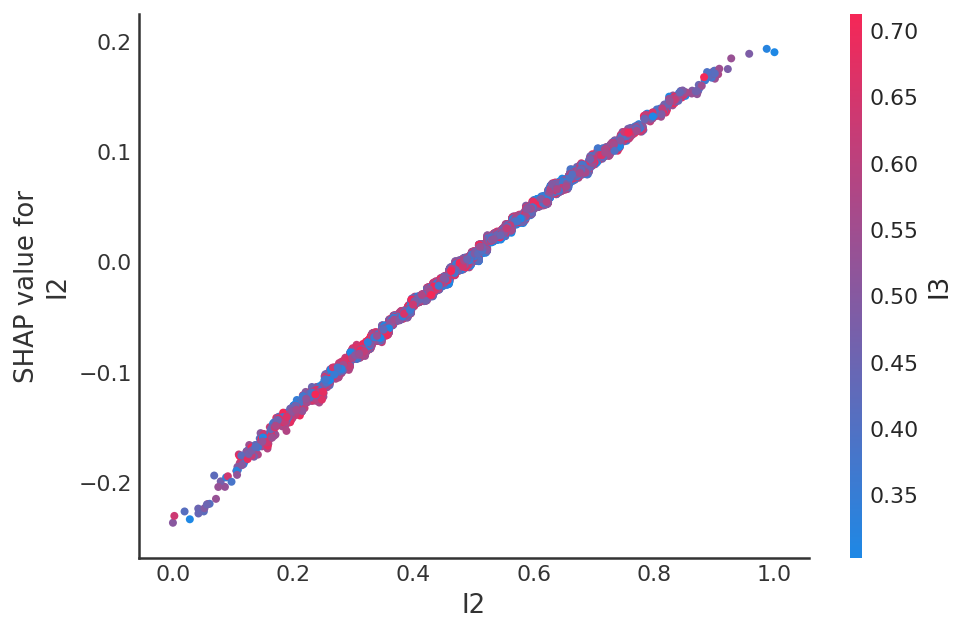

In [31]:
shap.dependence_plot("I2",shap_values,X,interaction_index="I3")

In [ ]:
LassoLarsCV(
    CombineDFs(
        Binarizer(input_matrix, threshold=0.25),
        PolynomialFeatures(
            StandardScaler(input_matrix),
            degree=2,
            include_bias=False,
            interaction_only=False)),
    normalize=True)